In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Overview of Data Provided

In [2]:
df_original = pd.read_csv('sales_data.csv')
df = df_original.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [4]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [5]:
df['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

<AxesSubplot:>

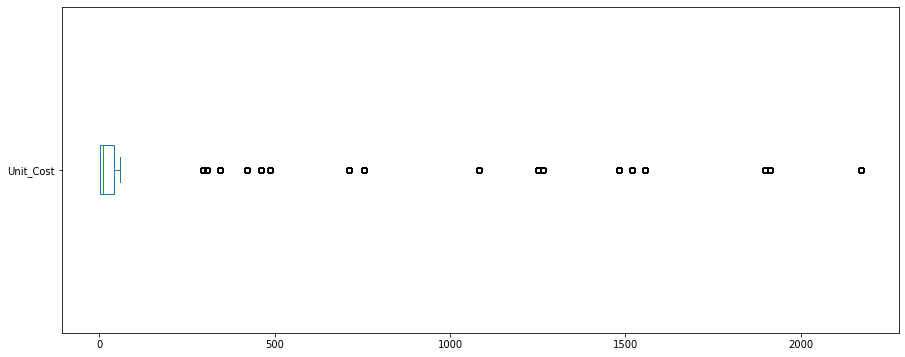

In [6]:
# Checking for outliers as max value too high as compare to mean and median
# to check for outlier, horizontal Box Plot is used. 

df['Unit_Cost'].plot(kind = 'box', vert=False, figsize = (15,6))

<AxesSubplot:ylabel='Density'>

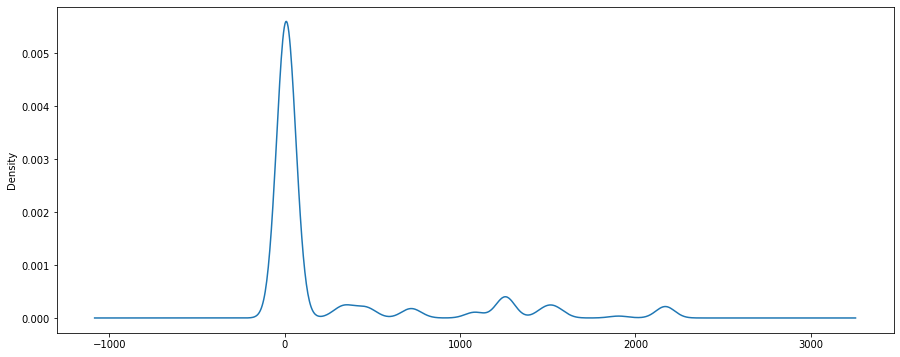

In [7]:
df['Unit_Cost'].plot(kind='density',figsize=(15,6))

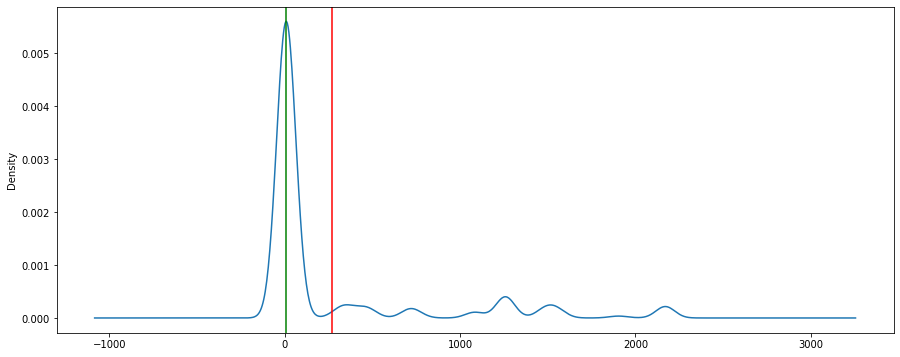

In [8]:
ax = df['Unit_Cost'].plot(kind='density',figsize=(15,6))
ax.axvline(df['Unit_Cost'].mean(), color='red')
ax.axvline(df['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'Price')

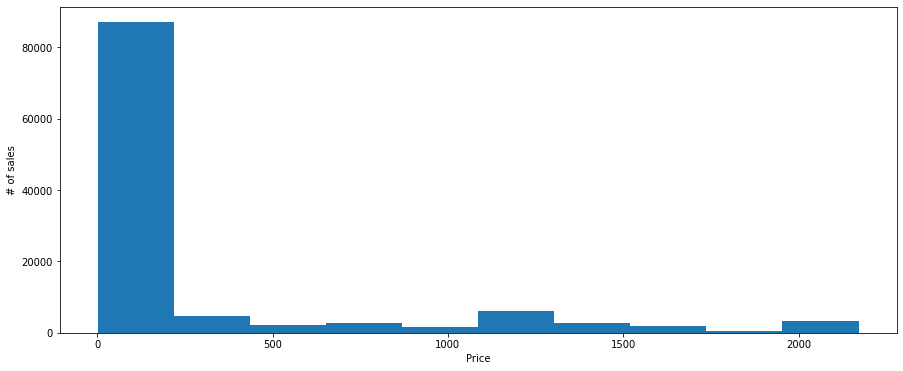

In [9]:
ax = df['Unit_Cost'].plot(kind='hist',figsize=(15,6))
ax.set_ylabel('# of sales')
ax.set_xlabel('Price')

In [10]:
## Categorical Analysis and Visualization

df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:ylabel='Age_Group'>

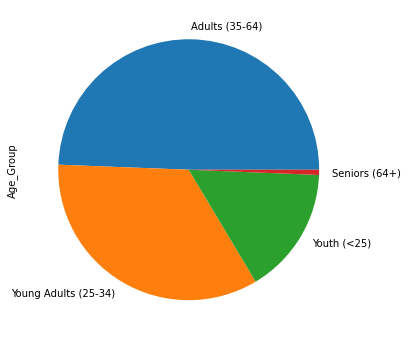

In [11]:
df['Age_Group'].value_counts().plot(kind='pie',figsize=(6,6))

Text(0, 0.5, '# of Sales')

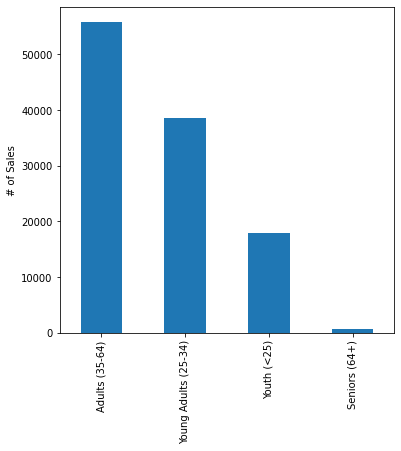

In [12]:
ax = df['Age_Group'].value_counts().plot(kind='bar',figsize=(6,6))
ax.set_ylabel('# of Sales')

<AxesSubplot:title={'center':'Profit'}, xlabel='[Age_Group]'>

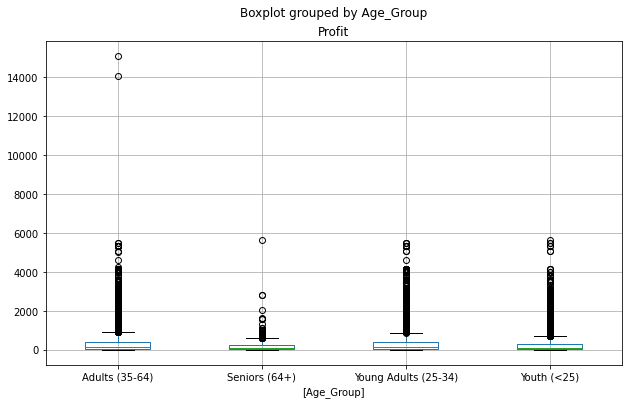

In [13]:
df[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))

In [14]:
## Relation between columns

corr_matrix = df.corr()
corr_matrix

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


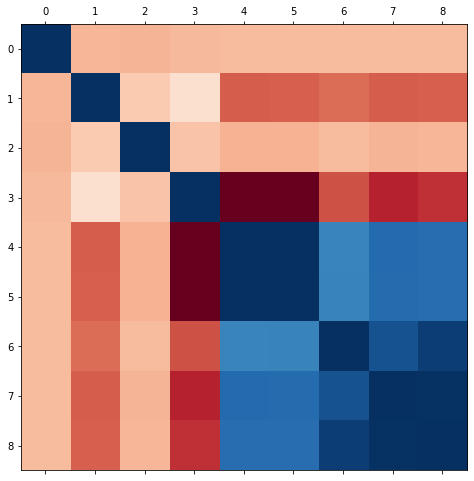

In [15]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr_matrix, cmap='RdBu', fignum=fig.number)

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

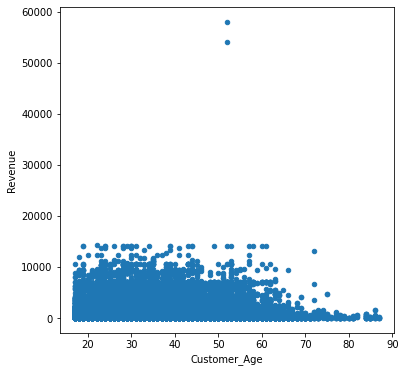

In [16]:
df.plot(kind='scatter',x='Customer_Age',y='Revenue', figsize=(6,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

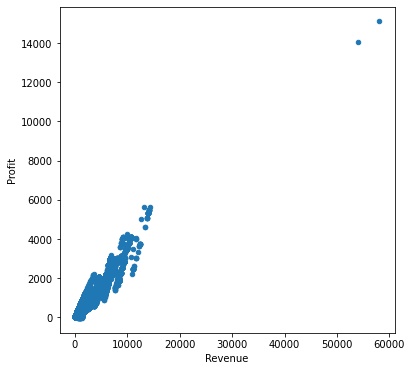

In [17]:
df.plot(kind='scatter',x='Revenue',y='Profit', figsize=(6,6))

Year                 AxesSubplot(0.125,0.536818;0.352273x0.343182)
Customer_Age      AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Order_Quantity          AxesSubplot(0.125,0.125;0.352273x0.343182)
Unit_Cost            AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

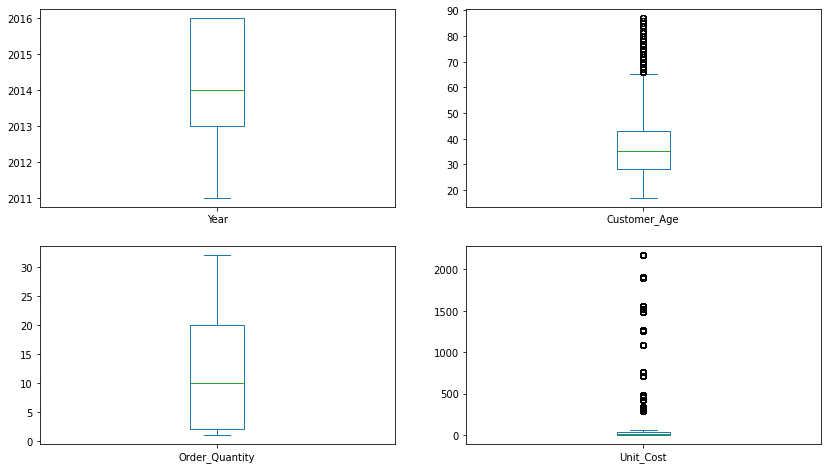

In [18]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost']
df[boxplot_cols].plot(kind='box',subplots=True, layout=(2,2),figsize=(14,8))

## Data Analysis: Working with data to extract information or make inference

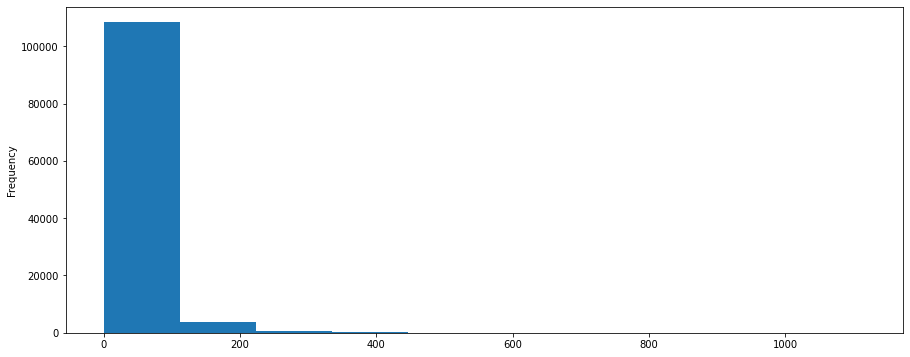

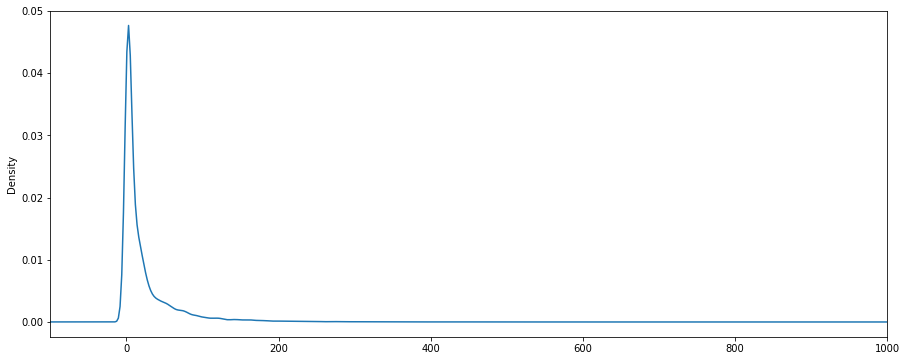

In [19]:
df['Revenue_per_Age'] = df['Revenue']/df['Customer_Age']
df['Revenue_per_Age'].plot(kind='hist', figsize=(15,6))
plt.show()
df['Revenue_per_Age'].plot(kind='density', figsize=(15,6))
plt.xlim([-100,1000])
plt.show()

In [20]:
df['Calculated_cost'] = df['Order_Quantity']*df['Unit_Cost']
mismatch_data = (df['Calculated_cost'] != df['Cost']).sum()
print(f'number of mismatch data: {mismatch_data}')

number of mismatch data: 0


<AxesSubplot:xlabel='Calculated_cost', ylabel='Profit'>

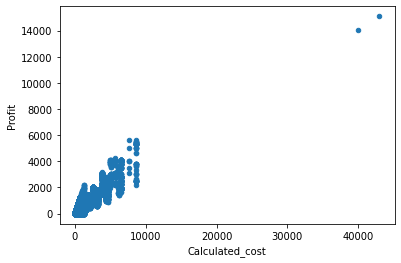

In [21]:
df.plot(kind='scatter',x= 'Calculated_cost', y='Profit')
# show linear dependency between Cost and profit of items